In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
alpha_08_df = pd.read_csv('all_alpha_08.csv')
alpha_18_df = pd.read_csv('all_alpha_18.csv')

In [3]:
print(f'{alpha_08_df.shape[1]} columns in the alpha 08 dataset')
print(f'{alpha_18_df.shape[1]} columns in the alpha 18 dataset')

18 columns in the alpha 08 dataset
18 columns in the alpha 18 dataset


In [4]:
print(f'{alpha_08_df.shape[0]} records in the alpha 08 dataset')
print(f'{alpha_18_df.shape[0]} records in the alpha 18 dataset')

2404 records in the alpha 08 dataset
1611 records in the alpha 18 dataset


In [5]:
print(f'{alpha_08_df.duplicated().sum()} duplicated rows in the alpha 08 dataset')
print(f'{alpha_18_df.duplicated().sum()} duplicated rows in the alpha 18 dataset')

25 duplicated rows in the alpha 08 dataset
0 duplicated rows in the alpha 18 dataset


In [6]:
print(f'{alpha_08_df.Fuel.nunique()} unique fuel types in the 08 dataset')
print(f'{alpha_18_df.Fuel.nunique()} unique fuel types in the 18 dataset')

5 unique fuel types in the 08 dataset
5 unique fuel types in the 18 dataset


In [7]:
# [sales area, cert region, Fuel, city mpg, hwy mpg, cmb mpg, unadj cmb mpg, 'greenhouse gas score', 'air pollution score']

In [8]:
alpha_08_df = alpha_08_df.rename(columns=lambda x:x.replace(' ', '_'))
alpha_18_df = alpha_18_df.rename(columns=lambda x:x.replace(' ', '_'))
alpha_18_df = alpha_18_df.rename(columns={'Cert_Region': 'Sales_Area'})
print('Column names standardized')

Column names standardized


In [9]:
alpha_18_df = alpha_18_df.drop(columns=['Comb_CO2', 'SmartWay', 'Stnd_Description'])
alpha_08_df = alpha_08_df.drop(columns=['SmartWay', 'Unadj_Cmb_MPG', 'FE_Calc_Appr'])
print("Unneeded columns dropped")

Unneeded columns dropped


In [10]:
alpha_08_df = alpha_08_df.query('Sales_Area == "CA"')
alpha_18_df = alpha_18_df.query('Sales_Area =="CA"')
print("Isolated the region to CA")
alpha_18_df = alpha_18_df.drop(columns=['Sales_Area'])
alpha_08_df = alpha_08_df.drop(columns=['Sales_Area'])
print("Deleted sales_area column")

Isolated the region to CA
Deleted sales_area column


In [11]:
alpha_08_df = alpha_08_df.dropna(axis=0)
alpha_18_df = alpha_18_df.dropna(axis=0)
print('Rows with missing values dropped')

Rows with missing values dropped


In [12]:
alpha_08_df.Cyl = alpha_08_df.Cyl.str.extract('(\d+)')
alpha_18_df['Cyl'] = alpha_18_df['Cyl'].astype(int)
print("Cleaned up the Cyl column for both datasets")

Cleaned up the Cyl column for both datasets


In [13]:
alpha_18_df['Greenhouse_Gas_Score'] = alpha_18_df['Greenhouse_Gas_Score'].astype(int)
alpha_18_df['Air_Pollution_Score'] = alpha_18_df['Air_Pollution_Score'].astype(int)
print("Fixed column dtypes for the 18 dataset")

Fixed column dtypes for the 18 dataset


In [14]:
cols = ['Fuel', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Air_Pollution_Score', 'Greenhouse_Gas_Score']
x= alpha_08_df[alpha_08_df['City_MPG'].str.contains('/')]
x1 = x.copy()
x2 = x.copy()
for i in cols:
    x1[i] = x1[i].apply(lambda x: x.split('/')[0])
    x2[i] = x2[i].apply(lambda x: x.split('/')[1])
alpha_08_df = alpha_08_df.drop(x.index)
alpha_08_df = alpha_08_df.append(x1, ignore_index=True)
alpha_08_df = alpha_08_df.append(x2, ignore_index=True)


cols = ['Fuel', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG']
x= alpha_18_df[alpha_18_df['City_MPG'].str.contains('/')]
x1 = x.copy()
x2 = x.copy()
for i in cols:
    x1[i] = x1[i].apply(lambda x: x.split('/')[0])
    x2[i] = x2[i].apply(lambda x: x.split('/')[1])
alpha_18_df = alpha_18_df.drop(x.index)
alpha_18_df = alpha_18_df.append(x1, ignore_index=True)
alpha_18_df = alpha_18_df.append(x2, ignore_index=True)

print("Fixed // values in the rows for both datasets")

Fixed // values in the rows for both datasets


In [15]:
alpha_08_df['Fuel'] = alpha_08_df['Fuel'].apply(lambda x: x.replace('gas', 'Gasoline'))
alpha_18_df['Fuel'] = alpha_18_df['Fuel'].apply(lambda x: x.replace('gas', 'Gasoline'))
alpha_18_df['Fuel'] = alpha_18_df['Fuel'].apply(lambda x: x.replace('Gas', 'Gasoline'))
alpha_18_df['Fuel'] = alpha_18_df['Fuel'].apply(lambda x: x.replace('Gasolineoline', 'Gasoline'))

print("Fixed the Fuel type naming system to be more standardized")

Fixed the Fuel type naming system to be more standardized


In [16]:
alpha_08_df['Air_Pollution_Score'] = alpha_08_df['Air_Pollution_Score'].astype(float).astype(int)
alpha_08_df['Greenhouse_Gas_Score'] = alpha_08_df['Greenhouse_Gas_Score'].astype('int64')
print("Fixed the changed dtypes of the 08 columns.")

Fixed the changed dtypes of the 08 columns.


In [17]:
alpha_18_df['Cmb_MPG'] = alpha_18_df['Cmb_MPG'].astype('int64')
alpha_08_df['Cmb_MPG'] = alpha_08_df['Cmb_MPG'].astype('int64')
print("Fixed datatypes for the Cmb_MPG columns")

Fixed datatypes for the Cmb_MPG columns


In [18]:
(alpha_18_df.dtypes == alpha_08_df.dtypes).all()

False

In [19]:
alpha_08_df.Fuel.value_counts()
print(f"In 2008, 2 car types used alternative fuel types")
alpha_18_df.Fuel.value_counts()
print(f"In 2018, 79 car types used alternative fuel types")
print(f"77 more car types used more alternative fuel")

In 2008, 2 car types used alternative fuel types
In 2018, 79 car types used alternative fuel types
77 more car types used more alternative fuel


In [20]:
print(f"In 2008 the average fuel economy was {round(alpha_08_df.Cmb_MPG.mean(), 2)}, in 2018 it was {round(alpha_18_df.Cmb_MPG.mean(), 2)} so we see an improvement of {round((round(alpha_18_df.Cmb_MPG.mean(), 2)) - round(alpha_08_df.Cmb_MPG.mean(), 2), 2) } mpg")

In 2008 the average fuel economy was 19.74, in 2018 it was 24.02 so we see an improvement of 4.28 mpg


## Which type of vehicle's fuel economy has improved the most since 2008?

In [21]:
round(alpha_18_df.groupby('Veh_Class').Cmb_MPG.mean(), 2)[1]

27.83

In [22]:
midsizedcar = round(alpha_18_df.groupby('Veh_Class').Cmb_MPG.mean(), 2)[1] - round(alpha_08_df.groupby('Veh_Class').Cmb_MPG.mean(), 2)[2]
print(f"Mid Sized cars had the highest increase in Cmb AVG of MPG : {midsizedcar}")

Mid Sized cars had the highest increase in Cmb AVG of MPG : 6.259999999999998


#### (2008) Average fuel economy by vehicle type

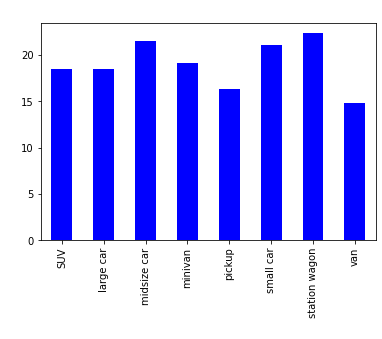

In [23]:
labels_list = ['blue']
wine_averages = alpha_08_df.groupby('Veh_Class').Cmb_MPG.mean()
wine_averages.plot(kind='bar', color=labels_list)
plt.title('Average Fuel economy by Vehicle type 2008', color='white')
plt.xlabel('Veh Type', color="White")
plt.ylabel('Fuel Econ', color="White")
plt.show()

#### (2018) Average fuel economy by vehicle type

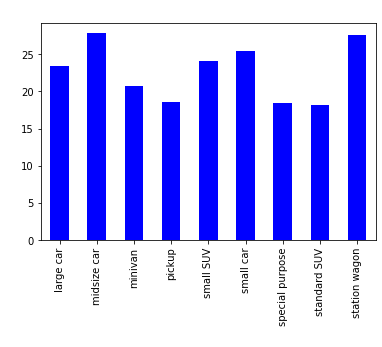

In [24]:
labels_list = ['blue']
wine_averages = alpha_18_df.groupby('Veh_Class').Cmb_MPG.mean()
wine_averages.plot(kind='bar', color=labels_list)
plt.title('Average Fuel economy by Vehicle type 2018', color='white')
plt.xlabel('Veh Type', color="White")
plt.ylabel('Fuel Econ', color="White")
plt.show()

## Which model has the highest `air_pollution_score` and fuel economy in 2008 and 2018? Compare them. 

In [25]:
highest_APS = alpha_18_df['Air_Pollution_Score'].idxmax()
print("This is the highest scoring car on the air pollution score index")
alpha_18_df.iloc[highest_APS]

This is the highest scoring car on the air pollution score index


Model                        AUDI A3
Displ                              2
Cyl                                4
Trans                          AMS-6
Drive                            4WD
Fuel                        Gasoline
Stnd                              S2
Underhood_ID            JVGAV02.0APA
Veh_Class                  small car
Air_Pollution_Score                7
City_MPG                          24
Hwy_MPG                           31
Cmb_MPG                           27
Greenhouse_Gas_Score               6
Name: 10, dtype: object

In [26]:
alpha_18_df.to_csv('alpha_18_df.csv', index=False)
alpha_08_df.to_csv('alpha_08_df.csv', index=False)
print("Saved")

alpha_08_df = pd.read_csv('alpha_08_df.csv')
alpha_18_df = pd.read_csv('alpha_18_df.csv')
print("Reloaded")

Saved
Reloaded
